In [10]:
#Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.mad import MAD
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats

In [11]:
# Cargar el conjunto de datos
df = pd.read_csv('BBDD_Insurance.csv', sep=';', decimal=',')

In [12]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Cargar el conjunto de datos
df = pd.read_csv('BBDD_Insurance.csv', sep=';', decimal=',')

# Calcular el sesgo y la curtosis de la variable Gastos
gastos = df['Gastos']

# Sesgo
sesgo = skew(gastos)

# Curtosis
curtosis = kurtosis(gastos)

print(f"Sesgo de la variable Gastos: {sesgo}")
print(f"Curtosis de la variable Gastos: {curtosis}")


Sesgo de la variable Gastos: 1.6352010936625407
Curtosis de la variable Gastos: 2.325522302094295


        Gastos  Gastos_winsorized
0     16378.38          16378.380
1      1863.60           1866.345
2      3737.55           3737.550
3     17807.42          17807.420
4      3248.16           3248.160
...        ...                ...
1333   9010.47           9010.470
1334   2161.86           2161.860
1335   1532.04           1866.345
1336   2228.82           2228.820
1337  31472.67          31472.670

[1338 rows x 2 columns]


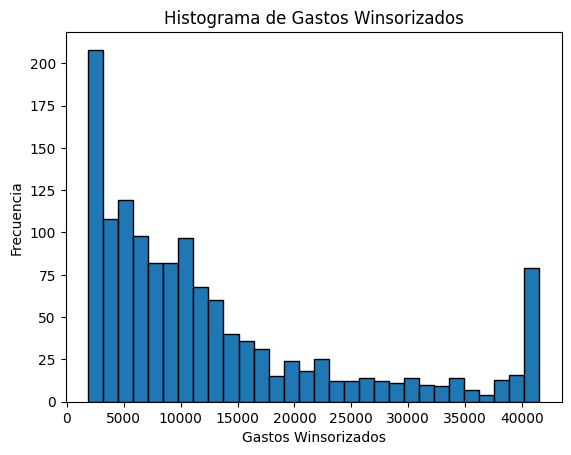

In [13]:
import pandas as pd
import scipy.stats as stats

# Cargar el conjunto de datos
df = pd.read_csv('BBDD_Insurance.csv', sep=';', decimal=',')

# Definir los límites para winsorizar (por ejemplo, al 5% y 95%)
lower_limit = df['Gastos'].quantile(0.05)
upper_limit = df['Gastos'].quantile(0.95)

# Aplicar winsorización
df['Gastos_winsorized'] = df['Gastos'].clip(lower=lower_limit, upper=upper_limit)

# Mostrar los resultados
print(df[['Gastos', 'Gastos_winsorized']])

# Crear el histograma de los datos winsorizados
plt.hist(df['Gastos_winsorized'],bins=30, edgecolor='black')
plt.title('Histograma de Gastos Winsorizados')
plt.xlabel('Gastos Winsorizados')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()


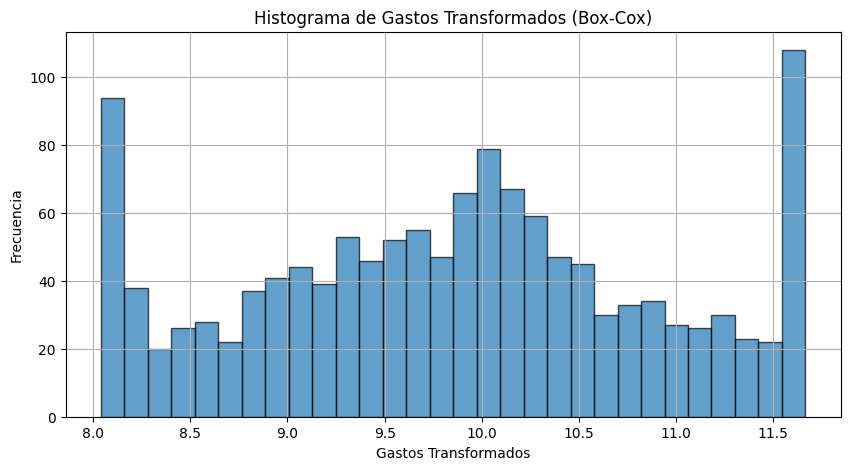

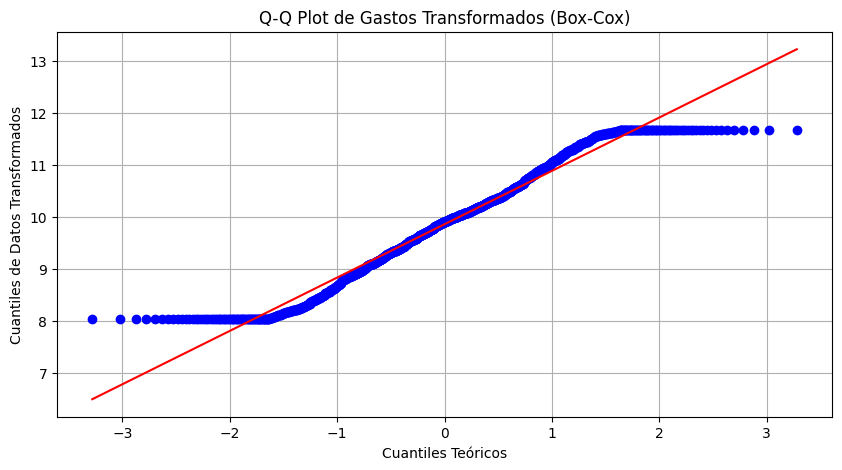

Valor de lambda utilizado en la transformación Box-Cox: 0.017148270676964956


In [14]:

# Suponiendo que ya has winsorizado los outliers
# Sustituye 'Gastos_winsorized' por la columna de datos winsorizados
gastos_winsorized = df['Gastos_winsorized']

# Realizar la transformación Box-Cox
boxcox_transformed, lambda_value = stats.boxcox(gastos_winsorized)

# Histograma de la variable 'Gastos' transformada
plt.figure(figsize=(10, 5))
plt.hist(boxcox_transformed, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de Gastos Transformados (Box-Cox)')
plt.xlabel('Gastos Transformados')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Q-Q plot de la variable 'Gastos' transformada
plt.figure(figsize=(10, 5))
stats.probplot(boxcox_transformed, dist="norm", plot=plt)
plt.title('Q-Q Plot de Gastos Transformados (Box-Cox)')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Datos Transformados')
plt.grid(True)
plt.show()

# Mostrar el valor de lambda utilizado en la transformación
print(f'Valor de lambda utilizado en la transformación Box-Cox: {lambda_value}')


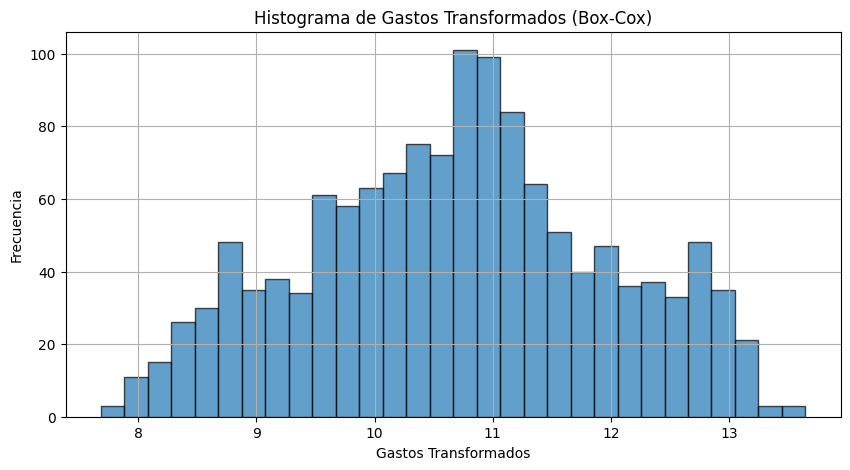

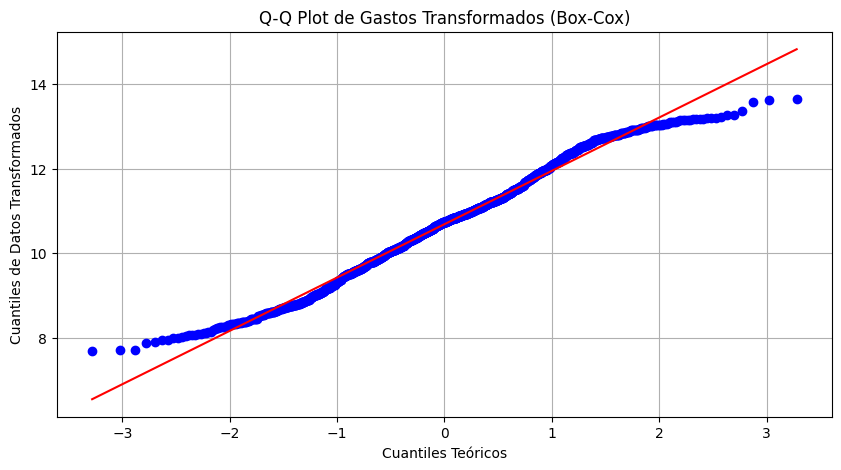

Valor de lambda utilizado en la transformación Box-Cox: 0.03414928031083851
Intervalo de confianza para lambda: (-0.018018018018018056, 0.08608608608608614)
La transformación Box-Cox es necesaria.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Cargar el conjunto de datos
df = pd.read_csv('BBDD_Insurance.csv', sep=';', decimal=',')

# Realizar la transformación Box-Cox
gastos = df['Gastos']
boxcox_transformed, lambda_value = stats.boxcox(gastos)

# Calcular el intervalo de confianza para lambda
ci = stats.boxcox_normmax(gastos, method='all')
llf = stats.boxcox_llf(lambda_value, gastos)

# Crear un rango de lambda para buscar el intervalo de confianza
lambda_range = np.linspace(-2, 2, 1000)
llf_values = [stats.boxcox_llf(lmbda, gastos) for lmbda in lambda_range]

# Encontrar el intervalo de confianza para lambda
ci_lower = lambda_range[np.where(np.array(llf_values) >= (llf - 0.5 * stats.chi2.ppf(0.95, 1)))[0][0]]
ci_upper = lambda_range[np.where(np.array(llf_values) >= (llf - 0.5 * stats.chi2.ppf(0.95, 1)))[0][-1]]

# Histograma de la variable 'Gastos' transformada
plt.figure(figsize=(10, 5))
plt.hist(boxcox_transformed, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de Gastos Transformados (Box-Cox)')
plt.xlabel('Gastos Transformados')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Q-Q plot de la variable 'Gastos' transformada
plt.figure(figsize=(10, 5))
stats.probplot(boxcox_transformed, dist="norm", plot=plt)
plt.title('Q-Q Plot de Gastos Transformados (Box-Cox)')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Datos Transformados')
plt.grid(True)
plt.show()

# Mostrar el valor de lambda y el intervalo de confianza
print(f'Valor de lambda utilizado en la transformación Box-Cox: {lambda_value}')
print(f'Intervalo de confianza para lambda: ({ci_lower}, {ci_upper})')

# Determinar si la transformación es necesaria
if ci_lower <= 1 <= ci_upper:
    print("La transformación Box-Cox no es necesaria.")
else:
    print("La transformación Box-Cox es necesaria.")


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Cargar el conjunto de datos
df = pd.read_csv('BBDD_Insurance.csv', sep=';', decimal=',')

# Seleccionar las columnas categóricas a codificar
categorical_cols = ["Region EEUU", "Sexo", "Fumador"]

# Aplicar One-Hot Encoding
encoder = OneHotEncoder(drop='first')  # drop='first' para evitar colinealidad
encoded_categorical = encoder.fit_transform(df[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar las columnas codificadas con el DataFrame original
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Dividir en características (X) y variable objetivo (y)
X = df_encoded.drop("Gastos", axis=1)
y = df_encoded["Gastos"]

# Añadir una constante a las características (intercepto del modelo)
X = sm.add_constant(X)

# Ajustar el modelo GLM Gaussiano
glm_gaussiano = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Resumen del modelo
print(glm_gaussiano.summary())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

# Cargar el conjunto de datos
df = pd.read_csv('BBDD_Insurance.csv', sep=';', decimal=',')

# Aplicar la transformación Box-Cox a la variable 'Gastos'
gastos = df['Gastos']
gastos_boxcox, lambda_value = boxcox(gastos)

# Reemplazar la variable 'Gastos' original con la transformada
df['Gastos'] = gastos_boxcox

# Dividir el dataframe en variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['Gastos'])
y = df['Gastos']

# Generar y guardar cinco divisiones diferentes usando diferentes valores de random_state
for seed in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Guardar las divisiones en archivos CSV
    X_train.to_csv(f'X_train_{seed}.csv', index=False)
    X_test.to_csv(f'X_test_{seed}.csv', index=False)
    y_train.to_csv(f'y_train_{seed}.csv', index=False)
    y_test.to_csv(f'y_test_{seed}.csv', index=False)

print(f'Valor de lambda utilizado en la transformación Box-Cox: {lambda_value}')
